In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de Resultados

In [35]:
original_df = pd.read_csv('../resultados_f1.csv')
optimizado_df = pd.read_csv('../resultados_f2.csv')

original_df.head(3)

,instance,solved,num_genotipos,num_sitios,solucion,time,num_clausulas,num_variables
0,instances/ms_10_6.txt,1,5,6,3,0.000157,978,1692
1,instances/ms_16_3.txt,1,8,3,4,0.000134,1740,1001
2,instances/ms_2_10.txt,1,1,10,2,0.000022,166,856


In [36]:
optimizado_df.head(3)

,instance,solved,num_genotipos,num_sitios,solucion,time,num_clausulas,num_variables
0,instances/ms_10_10.txt,1,5,10,7,0.000303,2544,11984
1,instances/ms_10_12.txt,1,5,12,10,0.000580,3614,23548
2,instances/ms_10_9.txt,1,5,9,1,0.000082,730,2656


In [37]:
# Instancias resueltas
original_solved = original_df[original_df['solved'] == 1].shape[0]
optimizado_solved = optimizado_df[optimizado_df['solved'] == 1].shape[0]

print(f"\nNúmero de instancias resueltas por el método original: {original_solved}")
print(f"Número de instancias resueltas por el método optimizado: {optimizado_solved}")


Número de instancias resueltas por el método original: 48
Número de instancias resueltas por el método optimizado: 66


In [38]:
combined_df = pd.merge(
    original_df[['instance', 'solved', 'time', 'num_clausulas', 'num_variables', 'solucion']],
    optimizado_df[['instance', 'solved', 'time', 'num_clausulas', 'num_variables', 'solucion']],
    on='instance',
    suffixes=('_original', '_optimizado'),
    how='outer'
)

# Number of wins (calidad solución)
original_better_quality = (combined_df['solucion_original'] < combined_df['solucion_optimizado']).sum()
optimizado_better_quality = (combined_df['solucion_original'] > combined_df['solucion_optimizado']).sum()

print(f"\nNúmero de instancias donde el método original es mejor que el optimizado en calidad de solución: {original_better_quality}")
print(f"Número de instancias donde el método optimizado es mejor que el original en calidad de solución: {optimizado_better_quality}")

# Number of wins (tiempo)
original_better_time = (combined_df['time_original'] < combined_df['time_optimizado']).sum()
optimizado_better_time = (combined_df['time_original'] > combined_df['time_optimizado']).sum()

print(f"\nNúmero de instancias donde el método original es mejor que el optimizado en tiempo: {original_better_time}")
print(f"Número de instancias donde el método optimizado es mejor que el original en tiempo: {optimizado_better_time}")


Número de instancias donde el método original es mejor que el optimizado en calidad de solución: 0
Número de instancias donde el método optimizado es mejor que el original en calidad de solución: 37

Número de instancias donde el método original es mejor que el optimizado en tiempo: 1
Número de instancias donde el método optimizado es mejor que el original en tiempo: 36


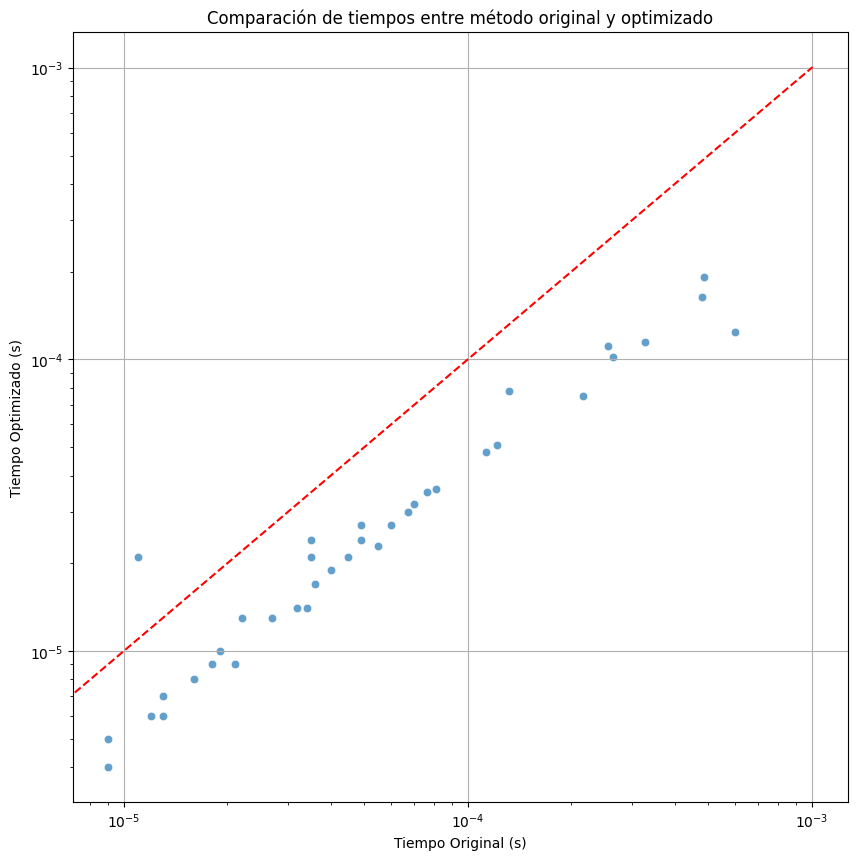

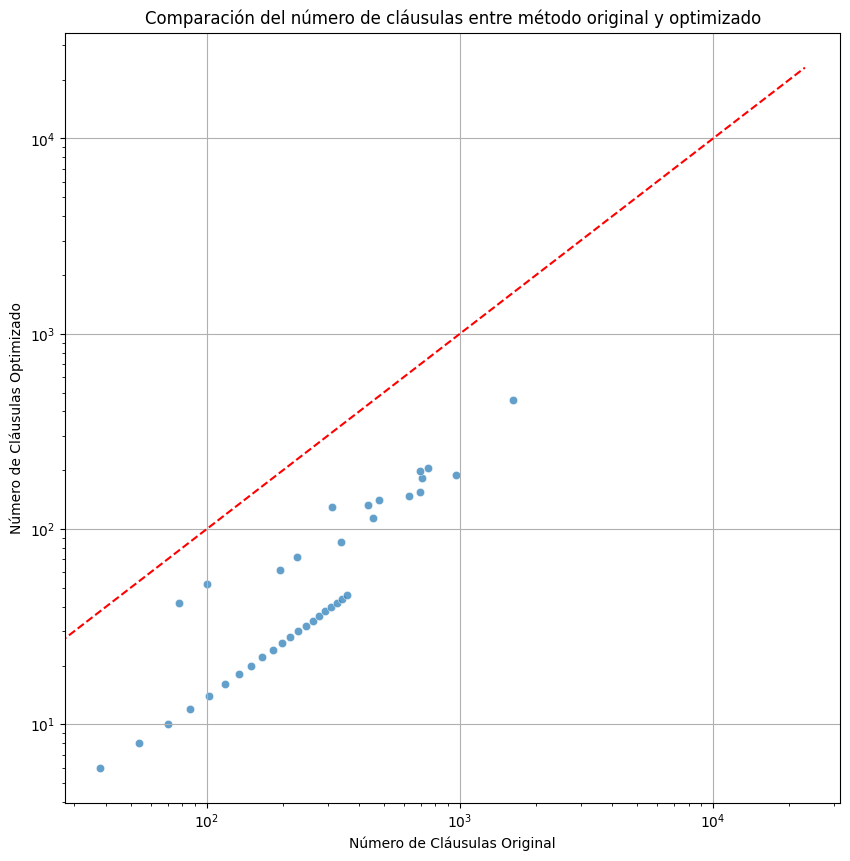

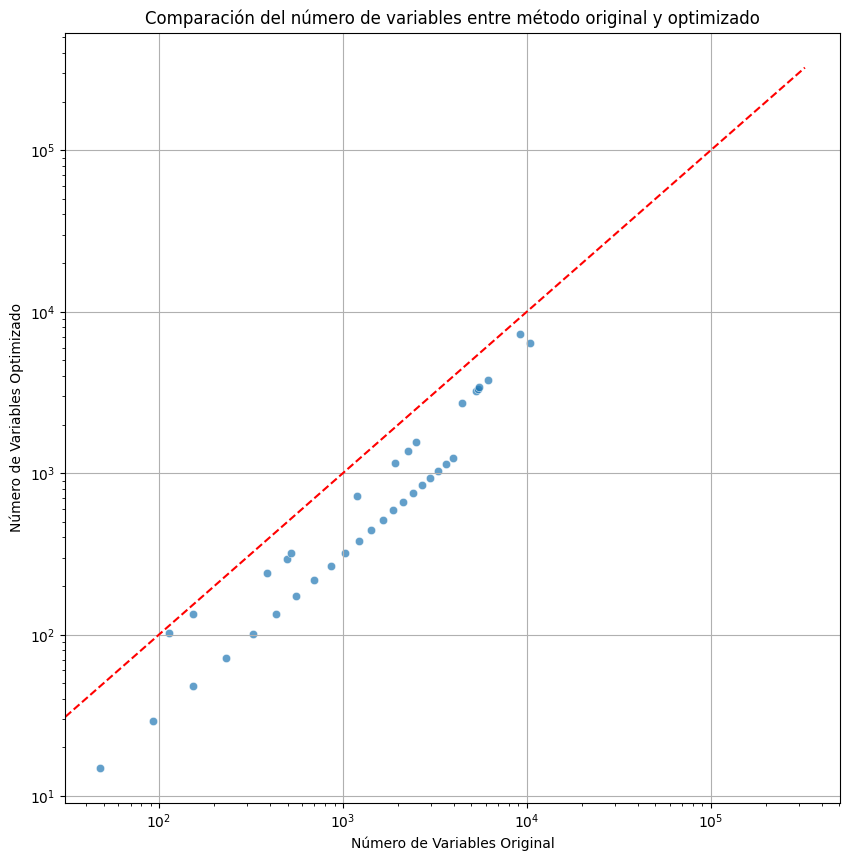

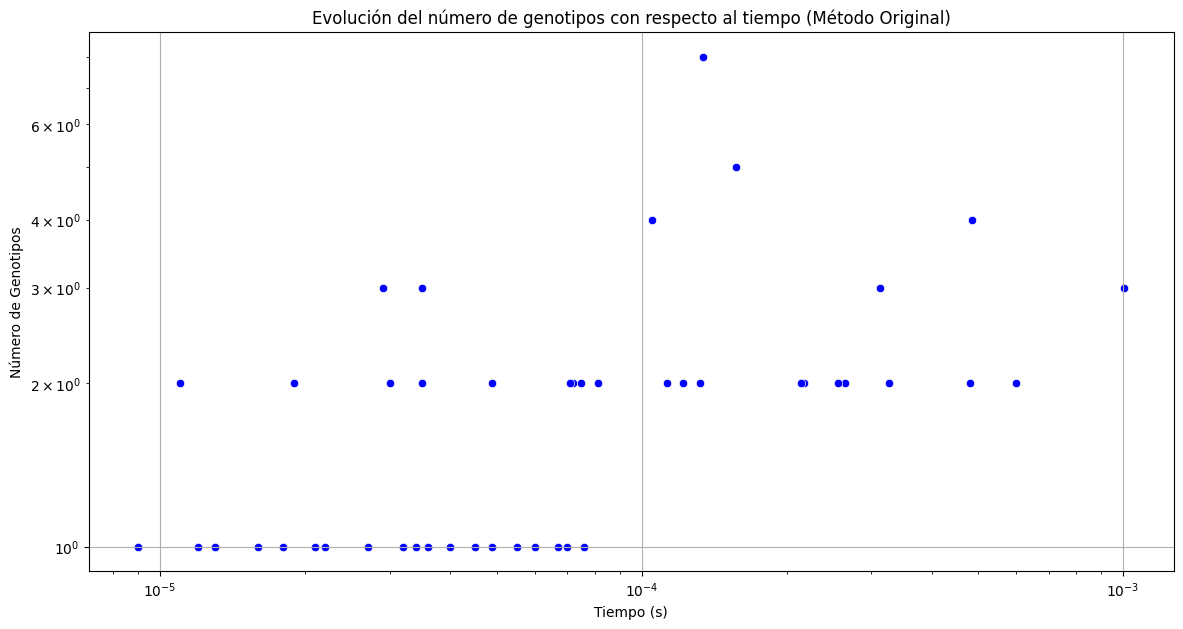

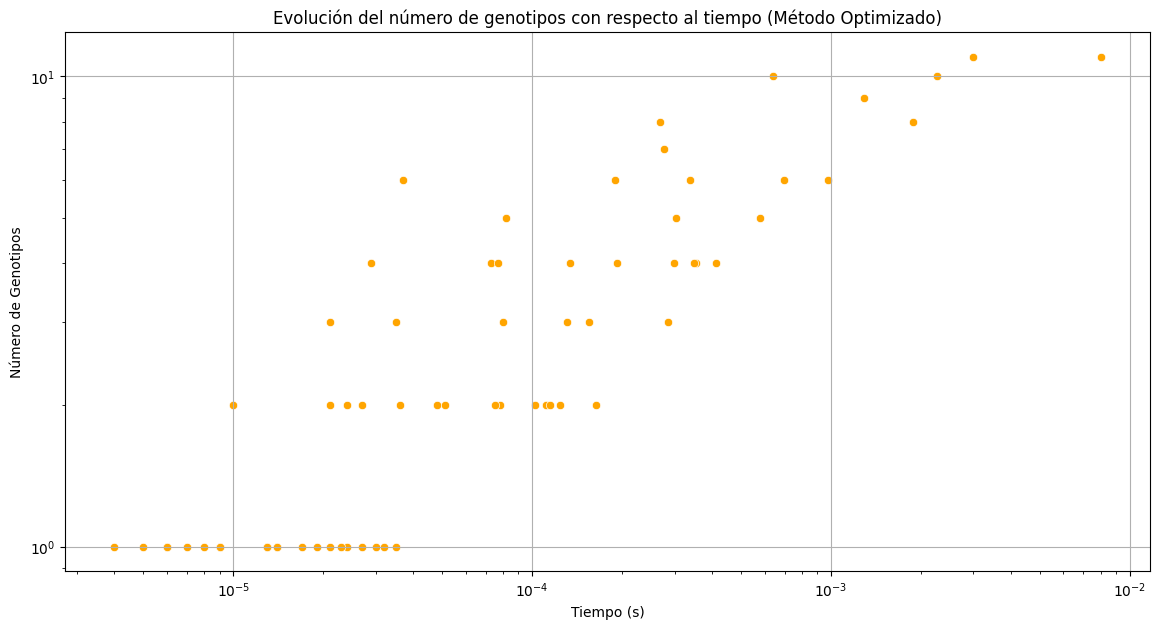

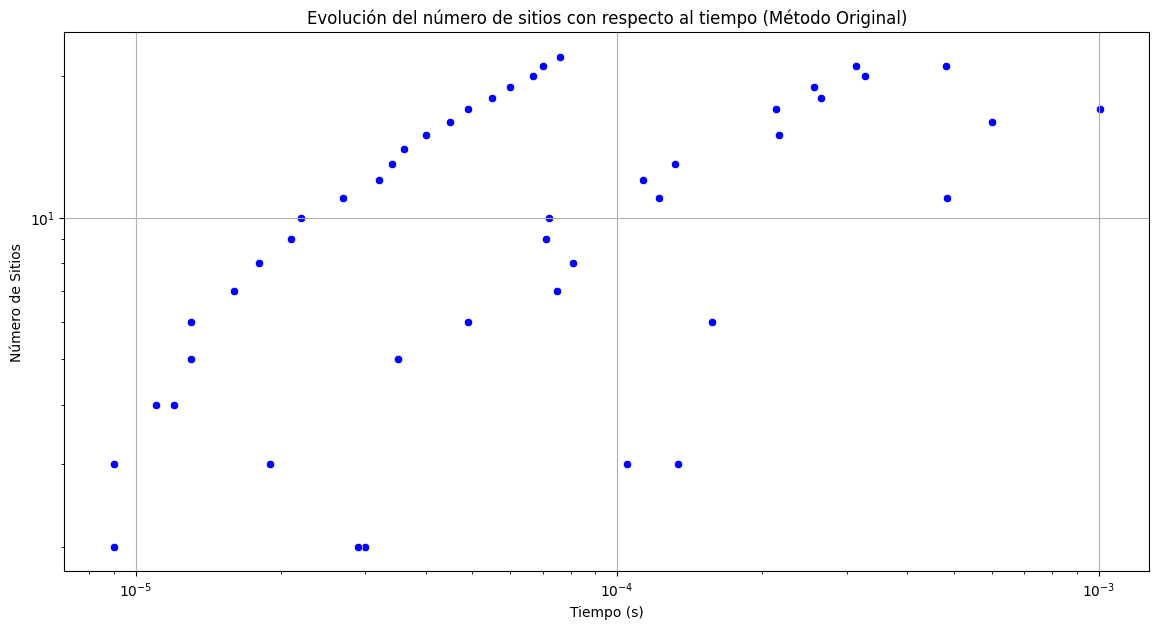

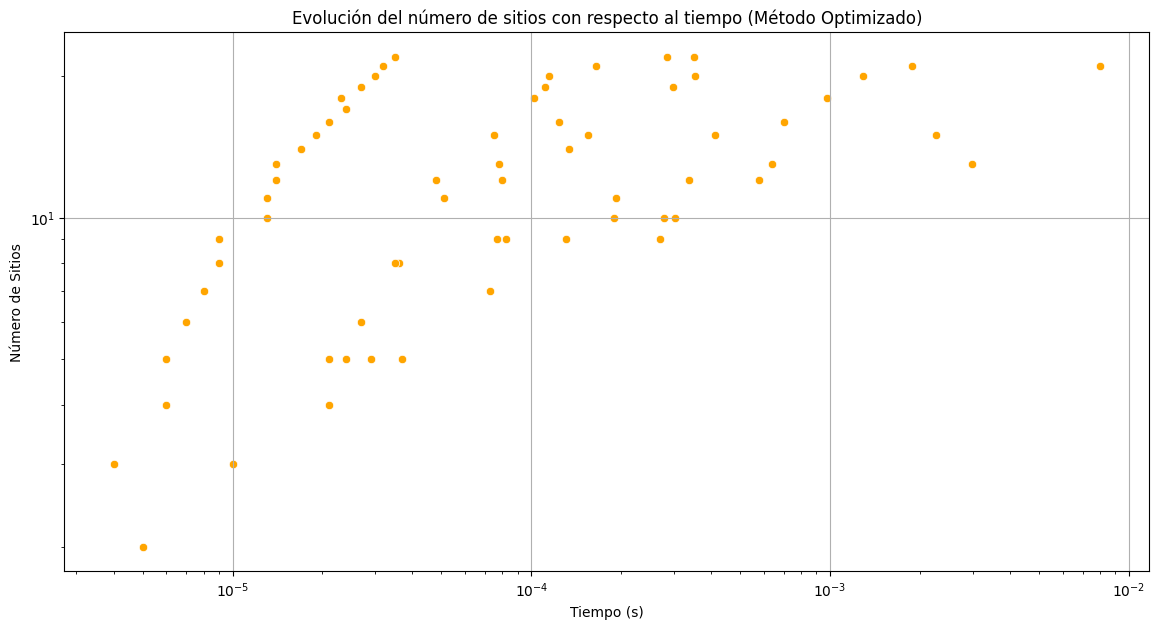

In [41]:
ruta_plots = "../plots/"

# Comparación de tiempos entre método original y optimizado
plt.figure(figsize=(10, 10))
sns.scatterplot(data=combined_df, x='time_original', y='time_optimizado', alpha=0.7)
plt.plot([0, combined_df['time_original'].max()], [0, combined_df['time_original'].max()], color='red', linestyle='--')  
plt.title('Comparación de tiempos entre método original y optimizado')
plt.xlabel('Tiempo Original (s)')
plt.ylabel('Tiempo Optimizado (s)')
plt.grid()
plt.xscale('log') 
plt.yscale('log') 
plt.savefig(ruta_plots + 'comparacion_tiempos.png') 
plt.show()

# Comparación del número de cláusulas entre método original y optimizado
plt.figure(figsize=(10, 10))
sns.scatterplot(data=combined_df, x='num_clausulas_original', y='num_clausulas_optimizado', alpha=0.7)
plt.plot([0, combined_df[['num_clausulas_original', 'num_clausulas_optimizado']].max().max()], 
         [0, combined_df[['num_clausulas_original', 'num_clausulas_optimizado']].max().max()], 
         color='red', linestyle='--')
plt.title('Comparación del número de cláusulas entre método original y optimizado')
plt.xlabel('Número de Cláusulas Original')
plt.ylabel('Número de Cláusulas Optimizado')
plt.grid()
plt.xscale('log')  
plt.yscale('log') 
plt.savefig(ruta_plots + 'comparacion_num_clausulas.png')
plt.show()

# Comparación del número de variables entre método original y optimizado
plt.figure(figsize=(10, 10))
sns.scatterplot(data=combined_df, x='num_variables_original', y='num_variables_optimizado', alpha=0.7)
plt.plot([0, combined_df[['num_variables_original', 'num_variables_optimizado']].max().max()], 
         [0, combined_df[['num_variables_original', 'num_variables_optimizado']].max().max()], 
         color='red', linestyle='--')
plt.title('Comparación del número de variables entre método original y optimizado')
plt.xlabel('Número de Variables Original')
plt.ylabel('Número de Variables Optimizado')
plt.grid()
plt.xscale('log')  
plt.yscale('log')  
plt.savefig(ruta_plots + 'comparacion_num_variables.png')  
plt.show()




# Evolución del tiempo con respecto al número de genotipos (gráficos separados)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=original_df, x='time', y='num_genotipos', color='blue')
plt.title('Evolución del número de genotipos con respecto al tiempo (Método Original)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Número de Genotipos')
plt.xscale('log')  
plt.yscale('log') 
plt.grid()
plt.savefig(ruta_plots + 'evolucion_genotipos_tiempo_original.png') 
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(data=optimizado_df, x='time', y='num_genotipos', color='orange')
plt.title('Evolución del número de genotipos con respecto al tiempo (Método Optimizado)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Número de Genotipos')
plt.xscale('log')  
plt.yscale('log')  
plt.grid()
plt.savefig(ruta_plots + 'evolucion_genotipos_tiempo_optimizado.png') 
plt.show()

# Evolución del tiempo con respecto al número de sitios (gráficos separados)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=original_df, x='time', y='num_sitios', color='blue')
plt.title('Evolución del número de sitios con respecto al tiempo (Método Original)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Número de Sitios')
plt.xscale('log')  
plt.yscale('log') 
plt.grid()
plt.savefig(ruta_plots + 'evolucion_sitios_tiempo_original.png') 
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(data=optimizado_df, x='time', y='num_sitios', color='orange')
plt.title('Evolución del número de sitios con respecto al tiempo (Método Optimizado)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Número de Sitios')
plt.xscale('log') 
plt.yscale('log')  
plt.grid()
plt.savefig(ruta_plots + 'evolucion_sitios_tiempo_optimizado.png')  
plt.show()




